In [1]:
from MTM import MTSystem
from mkutils import create_fig
import numpy as np

In [17]:
systems = []
m = 12
concs = [0.15, 0.05, 0.005] 
for conc in concs:
    systems.append(MTSystem(m=m, surfactant_concentration=conc))



/Users/matthias/CODE/MT_micellization/MTM/micelles/bilayer_vesicle.py:80: UserWarning: Error in Optimisation of micelle dimension: b'ABNORMAL_TERMINATION_IN_LNSRCH'
  warnings.warn(errmsg)
/Users/matthias/CODE/MT_micellization/MTM/micelles/rodlike_micelle.py:98: UserWarning: Error in Optimisation of micelle dimension: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(errmsg)
/Users/matthias/CODE/MT_micellization/MTM/micelles/rodlike_micelle.py:98: UserWarning: Error in Optimisation of micelle dimension: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(errmsg)
/Users/matthias/CODE/MT_micellization/MTM/mt_system.py:226: RuntimeWarning: overflow encountered in exp
  this_value = np.exp(g * (1.0 + np.log(monomer_conc) - mu_min) - 1.0)
/Users/matthias/CODE/MT_micellization/MTM/mt_system.py:185: RuntimeWarning: overflow encountered in d

[6.24006996e-07 7.21979989e-14] [1. 2.]


/Users/matthias/CODE/MT_micellization/MTM/micelles/bilayer_vesicle.py:80: UserWarning: Error in Optimisation of micelle dimension: b'ABNORMAL_TERMINATION_IN_LNSRCH'
  warnings.warn(errmsg)
/Users/matthias/CODE/MT_micellization/MTM/micelles/rodlike_micelle.py:98: UserWarning: Error in Optimisation of micelle dimension: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(errmsg)
/Users/matthias/CODE/MT_micellization/MTM/micelles/rodlike_micelle.py:98: UserWarning: Error in Optimisation of micelle dimension: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(errmsg)
/Users/matthias/CODE/MT_micellization/MTM/mt_system.py:226: RuntimeWarning: overflow encountered in exp
  this_value = np.exp(g * (1.0 + np.log(monomer_conc) - mu_min) - 1.0)
/Users/matthias/CODE/MT_micellization/MTM/mt_system.py:185: RuntimeWarning: overflow encountered in d

[6.22291424e-07 7.18015591e-14] [1. 2.]


/Users/matthias/CODE/MT_micellization/MTM/micelles/bilayer_vesicle.py:80: UserWarning: Error in Optimisation of micelle dimension: b'ABNORMAL_TERMINATION_IN_LNSRCH'
  warnings.warn(errmsg)
/Users/matthias/CODE/MT_micellization/MTM/micelles/rodlike_micelle.py:98: UserWarning: Error in Optimisation of micelle dimension: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(errmsg)
/Users/matthias/CODE/MT_micellization/MTM/micelles/rodlike_micelle.py:98: UserWarning: Error in Optimisation of micelle dimension: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(errmsg)
/Users/matthias/CODE/MT_micellization/MTM/mt_system.py:226: RuntimeWarning: overflow encountered in exp
  this_value = np.exp(g * (1.0 + np.log(monomer_conc) - mu_min) - 1.0)
/Users/matthias/CODE/MT_micellization/MTM/mt_system.py:185: RuntimeWarning: overflow encountered in d

[6.18491886e-07 7.09274353e-14] [1. 2.]


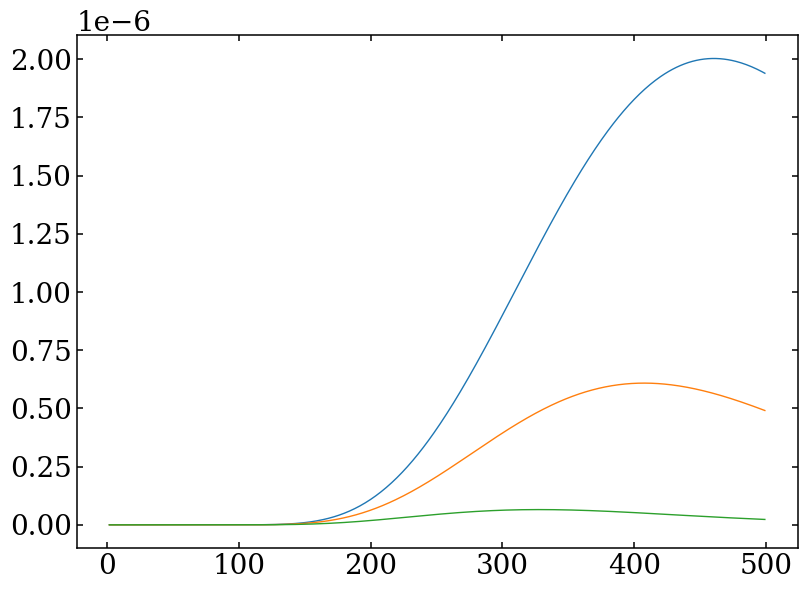

In [18]:
fig, ax = create_fig(1, 1)
ax = ax[0]
n=500
sizes = np.linspace(1,n,n)
for system in systems:
    distrib = system.get_aggregate_distribution()
    print(distrib[0:2], sizes[:2])
    ax.plot(sizes[1:-1], distrib[1:])